# Linear Models with small categorical Datasets

## Introduction and executive summary

The difficulty of working with small data sets is the simple fact that there is not much for any model to work with. 

The instructions stated to develop the model using only the provided data set xmas_movies. Which in the beginning had 700 different movies to work with. But after data cleaning and selection there ended up being only about 70 movies to use for training and testing. I used linear modeling to predict the Gross earnings of the following movie:

**Title**: The Magic of Bellmonte Lane

**Description**:
"The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.

**Director**: Greta Gerwig

**Cast**:
- Emma Thompson as Emily, a kind-hearted and curious woman
- Ian McKellen as Mr. Grayson, the stern corporate developer
- Tom Hanks as George, the wise and elderly owner of the local cafe
- Zoe Saldana as Sarah, Emily's supportive best friend
- Jacob Tremblay as Timmy, a young boy with a special Christmas wish

**Runtime**: 105 minutes


A linear model was chosen due to their ability to work well with small data sets and also with categorical data. The data did require careful analysis and curating. For example, there were a few famous actors that had very poor performances in Christmas movies. So I had to decide whether to keep those movies in or remove them.
My model ended up estimating a gross of about **72 Million**.


## Data Loading and basic cleaning


Step 1: Loading the data and some simple pre-processing


The data set in question has the following information

## 💾 The data


* `christmas_movies.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the rating/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |




A preview of the data is given below: 


In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
xmas_movies = pd.read_csv('data/christmas_movies.csv')


xmas_movies.head(2)


,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M


In [2]:
print("As you can see Gross has a mixture of symbols and numbers. In order to perform visualization on such data, it needs to be transformed.")
print(xmas_movies['gross'].head(2))

As you can see Gross has a mixture of symbols and numbers. In order to perform visualization on such data, it needs to be transformed.
0    $59.70M
1    $71.32M
Name: gross, dtype: object


In [3]:

print("The original Data set has about",len(xmas_movies),'values. But how many will be kept once null values are dropped?')
xmas_movies.head(1)

The original Data set has about 788 values. But how many will be kept once null values are dropped?


,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M


In [4]:
xmas_movies = xmas_movies.drop_duplicates( subset="title" , keep='first') # Dropping duplicates
xmas_movies = xmas_movies[xmas_movies['imdb_rating'].notna()] #Getting rid of null values
xmas_movies = xmas_movies[xmas_movies['stars'].notna()]
xmas_movies['Star1'] = xmas_movies['stars'].str.split(',').str[0]
xmas_movies['Star2'] = xmas_movies['stars'].str.split(',').str[1]
xmas_movies['Star3'] = xmas_movies['stars'].str.split(',').str[2]
xmas_movies['Star4'] = xmas_movies['stars'].str.split(',').str[3]
shorter_movies_now_xmas=xmas_movies[xmas_movies['gross'].notna()]
shorter_movies_now_xmas['gross'] = shorter_movies_now_xmas['gross'].str.replace("$", "") # The gross values are strings made of $ and  surrounded by quotes
shorter_movies_now_xmas['gross'] = shorter_movies_now_xmas['gross'].str.replace("M", "")
shorter_movies_now_xmas['gross']=shorter_movies_now_xmas['gross'].astype(float)*1000000


**How many movies are there left now?** 

In [5]:
print("The shorter data set now has",len(shorter_movies_now_xmas)," rows instead of 788.")

The shorter data set now has 77  rows instead of 788.


In [6]:
shorter_movies_now_xmas = shorter_movies_now_xmas.drop(shorter_movies_now_xmas[shorter_movies_now_xmas['title'] == 'The Polar Express'].index) # Did sooo bad in theaters
shorter_movies_now_xmas = shorter_movies_now_xmas.drop(shorter_movies_now_xmas[shorter_movies_now_xmas['title'] == "Mickey's Christmas Carol"].index) # Wrong information
shorter_movies_now_xmas = shorter_movies_now_xmas.drop(shorter_movies_now_xmas[shorter_movies_now_xmas['title'] == "Black Christmas"].index) # Did really badly in theaters
shorter_movies_now_xmas = shorter_movies_now_xmas.drop(shorter_movies_now_xmas[shorter_movies_now_xmas['title'] == "The Apartment"].index) #Did really badly in theaters for cast


## EDA and visualizations - gross earnings


The most important part of any analysis, the exploratory data analysis.

### Histogram of the earnings of movies

When the data is visualized as a histogram, it shows a few data points that are very skewed to the right. So I think I will drop those before we begin. This will help keep the model from making predictions that are too wild. 

<AxesSubplot: >

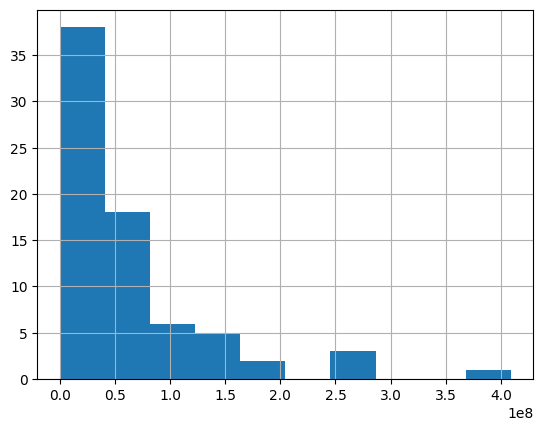

In [7]:
shorter_movies_now_xmas['gross'].hist(bins=10)

In [8]:
plotting_movies = xmas_movies.melt(id_vars='rating', var_name='rating')

### Boxplot of the distributions of the runtimes vs earnings

There is not much there. Since movies that appear on TV only tend to make much less money.

In [9]:
import plotly.express as px

fig = px.box(shorter_movies_now_xmas, x="rating", y="gross", title = "Ratings vs Gross Earnings", color = 'rating')
fig.show()

### Boxplots of Genre Vs earnings

In [10]:
import plotly.express as px

fig = px.box(shorter_movies_now_xmas, x="genre", y="gross", title = "Genre Vs Gross", color = 'genre')
fig.show()

## EDA and visualizations - Directors and Genres

In [11]:
frequent_directors=xmas_movies.director.value_counts() # Most frequent directors
more_than_4=frequent_directors.head(24)
labels=['more_than_4','all_other_movies']
values=[171,557] 

In [12]:
frequent_directors=xmas_movies.director.value_counts()
more_than_4=frequent_directors.head(24)
more_than_4_dataframe=pd.DataFrame(more_than_4)
more_than_4_dataframe =more_than_4_dataframe.reset_index()


In [13]:

just_directors = more_than_4_dataframe['index']
genres_for_top_directors =[]
for i in just_directors:
    okay_now=xmas_movies['genre'][xmas_movies['director']==i].to_list()
    genres_for_top_directors.append(okay_now)



In [14]:
def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]

In [15]:
abc=flatten_comprehension(genres_for_top_directors) # Flattenned the list

In [16]:
counter1 ={}
for i in abc:
    if i not in counter1:
        counter1[i] = 0
    counter1[i] += 1

In [17]:
df1 = pd.DataFrame.from_dict(counter1, orient='index').reset_index()
df1=df1.rename(columns={"index": "Genre", 0: "Counts"})

In [18]:
more_than_4.head(10)

David Winning       13
Peter Sullivan      12
Justin G. Dyck      12
Jake Helgren        11
Fred Olen Ray       10
Terry Ingram         9
Michael M. Scott     8
Marita Grabiak       8
Don McBrearty        8
Ron Oliver           8
Name: director, dtype: int64

In [19]:
df1=df1.sort_values(by=['Counts'],ascending=False)
directors_of_movies_df=pd.DataFrame(more_than_4.reset_index())

In [20]:
directors_of_movies_df=directors_of_movies_df.rename(columns={"index":"Director","director":'counts'})
directors_of_movies_df

,Director,counts
0,David Winning,13
1,Peter Sullivan,12
2,Justin G. Dyck,12
3,Jake Helgren,11
4,Fred Olen Ray,10
5,Terry Ingram,9
6,Michael M. Scott,8
7,Marita Grabiak,8
8,Don McBrearty,8
9,Ron Oliver,8


In [21]:
import plotly.figure_factory as ff
import numpy as np
import plotly.express as px

In [22]:
abc1=xmas_movies['genre'].dropna()
new_list =[]
for line in abc1:
    genres = [genre.strip() for genre in line.split(',')]
    for genre in genres:
        new_list.append(genre)
counter ={}
for i in new_list:
    if i not in counter:
        counter[i] = 0
    counter[i] += 1
    
df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df=df.rename(columns={"index": "Genre", 0: "Counts"})


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   23 non-null     object
 1   Counts  23 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 496.0+ bytes


In [24]:

import plotly.graph_objects as px 
import numpy
import plotly.graph_objs as go
  
plot = px.Figure(data=[go.Bar( #This first one is for the directors
    name='Data 1', 
    x=directors_of_movies_df.Director, 
    y=directors_of_movies_df.counts,marker_color='crimson'

), 

    go.Scatter( 
    name='Movie imdb_rating and release year', 
    y=xmas_movies.imdb_rating, 
    x=xmas_movies.release_year,mode = 'markers',marker_color=xmas_movies.imdb_rating # rating vs release year
),
    go.Pie(labels=labels,values=values,title='% of movies done by top directors',marker=dict(line=dict(color='#000000', width=2)),domain={'x': [0.6, 0.9], 'y': [0.37, 0.8]}
),

                       
    # Pie chart for directors
    go.Bar( #This first one is for the directors
    name='Counts of combinations of genres', 
    x=df1.Genre, 
    y=df1.Counts,marker_color='crimson'),
        # Pie chart for directors
    go.Histogram( #This first one is for the directors
    name='Counts of Single Genres', 
    histfunc= 'sum',
    x=df.Genre,y=df.Counts,marker_color='crimson')
                       
]) 

  
# Add dropdown 
plot.update_layout( 
    updatemenus=[
        dict( 
            type="buttons", 
            direction="up", 
            buttons=list([ 
                dict(label="Top Director Stats", 
                     method="update", 
                     args=[{"visible": [True, False,True,False,False]}, 
                           {"title": "Top Directors and how many Holiday movies each has done", 
                            }]), 
                
                dict(label="Movies and rating distributions", 
                     method="update", 
                     args=[{"visible": [False, True,False,False]}, 
                           {"title": "Movies and rating distributions", 
                            }]), 
                dict(label="Counts of combinations of genres", 
                     method="update", 
                     args=[{"visible": [False, False,False,True,False]}, 
                           {"title": "Distributions of genre combinations", 
                            }]),
                dict(label="Counts of Single Genres", 
                     method="update", 
                     args=[{"visible": [False, False,False,False,True]}, 
                           {"title": "Distribution of single genres",
                            }]), 
            ]), 
        ) 
    ]) 
plot.show()

## More Data cleaning Model prep
### General Information 

Going to prepare the data for use with my linear model.
Some General information is below.

### Feature Selection

Feature selection for this project required reasoning of the human kind. For example, if a movie did really poorly but the actor generally did well, I had to choose whether to remove the movie or not. Or if a movie came from a genre that was not common to movies in theaters. I ended up using backward selection also, by starting with all possible features and then slowly removing them, I helped make my model as optimal as possible for the data present.

### Encoding

All data fed into most machine learning models (linear models are no exception) must be transformed into numerical format so the model can take it in and use the data for learning tasks.

I  am using a combination of dummy encoding and one hot encoding. 
Both of these methods take all of the variables fed to them and output a really big array/matrix where a 'hit' is a 1 and everything else is 0.


So it goes from:

| Variable       | Star1        | Star2               |   Star3                                  |
|----------------|-------------|-----------------|-------------------------------------------|
| `Movie`        | Tom Hanks   |    Hugh Grant    |     Laura Linney                              |

Where each star is a variable itself


To:


| Variable       | Tom Hanks |  Hugh Grant| Liam Neeson                  |                            |
|----------------|-------------|-------------|-------------------|----------------------------|
| `Movie`        | 1  |       1     |          0         |                              |

Where each star is now a separate column in a big matrix. So if the movie did have Tom Hanks, there would now be a 1 in that column. And if the star was NOT in that movie, there would be a 0.



*General Model Information:*

|Model Info       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `Model Type`        | Linear                                               |
| `Encoding Type` | Dummy and one hot encoding                                            |
| `library used` | Scikit-Learn                                           |





### Model 1

Linear model that includes ``'runtime','director','Star1','Star2','Star3','Star4','genre'`` as variables.
All will be one hot encoded and a prediction will be cast using a subset of the training set.

In [25]:
# Making the amount of movies less by excluding those movies that were way too skewed in value

shorter_movies_now_xmas = shorter_movies_now_xmas[shorter_movies_now_xmas["gross"] <=210000000]
shorter_movies_now_xmas=shorter_movies_now_xmas.reset_index(drop=True)

In [26]:
shorter_movies_now_xmas_55 =shorter_movies_now_xmas[['runtime','director','Star1','Star2','Star3','Star4','gross','genre']]
shorter_movies_now_xmas_55=shorter_movies_now_xmas_55.reset_index(drop=True)


In [27]:
# Adding the test variable
shorter_movies_now_xmas_55.loc[len(shorter_movies_now_xmas_55)]=[105.0,'Greta Gerwig','Emma Thompson','Ian McKellen','Tom Hanks','Zoe Saldana',0,'Family, Fantasy, Romance, Holiday']


In [28]:
shorter_movies_now_xmas_55.tail(1)

,runtime,director,Star1,Star2,Star3,Star4,gross,genre
69,105.0,Greta Gerwig,Emma Thompson,Ian McKellen,Tom Hanks,Zoe Saldana,0.0,"Family, Fantasy, Romance, Holiday"


In [29]:
#shorter_movies_now_xmas_55=shorter_movies_now_xmas_55.reset_index(drop=True)

In [30]:
import pandas as pd
#One hot encoding
all_names = set(shorter_movies_now_xmas_55['Star1']).union(shorter_movies_now_xmas_55['Star2']).union(shorter_movies_now_xmas_55['Star3']).union(shorter_movies_now_xmas_55['Star4']).union(shorter_movies_now_xmas_55['director'])



for name in all_names:
    shorter_movies_now_xmas_55[name] = shorter_movies_now_xmas_55.apply(lambda row: 1 if name in row.values else 0, axis=1)

In [31]:
shorter_movies_now_xmas_55['runtime']=pd.cut(x=shorter_movies_now_xmas_55['runtime'],bins=[0,70,101,140],
                                             labels =['short','medium','long'])

shorter_movies_now_xmas_55['genre'] = shorter_movies_now_xmas_55['genre'].str.replace(" ", "") #Trying to leave genres as is  undo this line if you run into trouble and remove genres from the below box



In [32]:
len(shorter_movies_now_xmas_55)

70

In [33]:
trying=shorter_movies_now_xmas_55['genre']
trying=pd.DataFrame(trying)

In [34]:
df = pd.concat([trying[x].str.get_dummies(',') for x in trying], keys=trying.columns, axis=1)
df.columns = df.columns.map('_'.join)


In [35]:
shorter_movies_now_xmas_55= shorter_movies_now_xmas_55.drop(['runtime','Star1','Star2','Star3','Star4','director','genre'],axis=1)

In [36]:
# shift column 'Name' to first position 
first_column = shorter_movies_now_xmas_55.pop('gross') 
  
# insert column using insert(position,column_name, 
# first_column) function 
shorter_movies_now_xmas_55.insert(0, 'gross', first_column) 

In [37]:
df_out = pd.concat([shorter_movies_now_xmas_55, df], axis=1)

In [38]:
selected_column = df_out.iloc[:,1: ]
y=df_out['gross']
X=selected_column
X_train =selected_column.iloc[:-1]
y_train =df_out.iloc[:-1]['gross']
X_test =selected_column.iloc[-1:]
y_test =df_out.iloc[-1:]['gross']
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
linear_model1=linear_model.LinearRegression()
linear_model=LinearRegression().fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
y_true =y_test
result=pd.DataFrame(list(y_pred))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
result=pd.DataFrame(list(y_pred))
result.reset_index(drop=True)
y_true=y_true.reset_index(drop=True)
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'gross':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1

,true,predicted,how_off
0,0.000,51795513.521,-inf


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 110)
linear_model1=linear_model.LinearRegression()
linear_model=LinearRegression().fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
y_true =y_test
#result=pd.DataFrame(list(y_pred))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#result=pd.DataFrame(list(y_pred))
#result.reset_index(drop=True)
y_true=y_true.reset_index(drop=True)
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'gross':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1

,true,predicted,how_off
0,7570000.000,33117037.608,-337.477
1,108100000.000,9071321.437,91.608
2,35150000.000,53779146.844,-52.999
3,56360000.000,23952032.529,57.502
4,132090000.000,32470564.243,75.418
5,137860000.000,53484957.969,61.203
6,67360000.000,43140860.832,35.955


In [40]:
np.mean(results_trial1['how_off'])

-9.82717244174748

### Model 2

The model seemed to perform pretty well. Maybe I can perform some steps to improve it just a little more. 
During EDA it was noted that some movies in the data set did not have the ratings common to movies in theaters. So as part of feature selection I will remove them, to see if my values improve. As well as remove movies that grossed very little. 
The end result performed slightly better. 


In [41]:
shorter_movies_now_xmas = shorter_movies_now_xmas.drop(shorter_movies_now_xmas[shorter_movies_now_xmas['rating'] == 'Not Rated'].index) 
shorter_movies_now_xmas = shorter_movies_now_xmas.drop(shorter_movies_now_xmas[shorter_movies_now_xmas['rating'] == 'Passed'].index) 
shorter_movies_now_xmas = shorter_movies_now_xmas[shorter_movies_now_xmas["gross"] >=20000000]
shorter_movies_now_xmas=shorter_movies_now_xmas.reset_index(drop=True)


<AxesSubplot: >

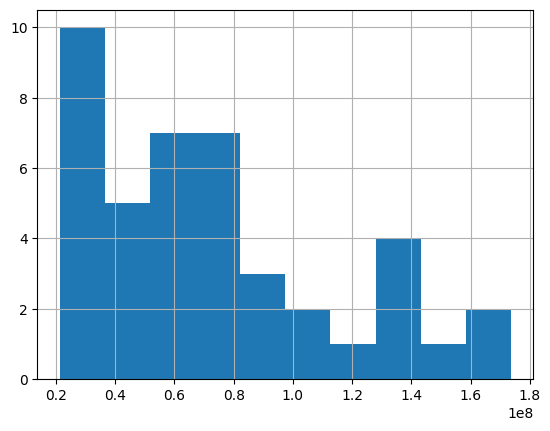

In [42]:
shorter_movies_now_xmas['gross'].hist(bins=10)

In [43]:
shorter_movies_now_xmas_55 =shorter_movies_now_xmas[['runtime','director','Star1','Star2','Star3','Star4','gross','genre']]
shorter_movies_now_xmas_55=shorter_movies_now_xmas_55.reset_index(drop=True)

In [44]:
import pandas as pd
#Removing director
all_names = set(shorter_movies_now_xmas_55['Star1']).union(shorter_movies_now_xmas_55['Star2']).union(shorter_movies_now_xmas_55['Star3']).union(shorter_movies_now_xmas_55['Star4']).union(shorter_movies_now_xmas_55['director'])



for name in all_names:
    shorter_movies_now_xmas_55[name] = shorter_movies_now_xmas_55.apply(lambda row: 1 if name in row.values else 0, axis=1)

In [45]:
#shorter_movies_now_xmas_55.loc[len(shorter_movies_now_xmas_55)]=[105.0,'Greta Gerwig','Emma Thompson','Ian McKellen','Tom Hanks','Zoe Saldana',0,'Family, Fantasy, Romance, Holiday']

In [46]:
shorter_movies_now_xmas_55['runtime']=pd.cut(x=shorter_movies_now_xmas_55['runtime'],bins=[0,70,101,140],
                                             labels =['short','medium','long'])

shorter_movies_now_xmas_55['genre'] = shorter_movies_now_xmas_55['genre'].str.replace(" ", "") #Trying to leave genres as is  undo this line if you run into trouble and remove genres from the below box

In [47]:
trying=shorter_movies_now_xmas_55['genre']
trying=pd.DataFrame(trying)

In [48]:
df = pd.concat([trying[x].str.get_dummies(',') for x in trying], keys=trying.columns, axis=1)
df.columns = df.columns.map('_'.join)

In [49]:
shorter_movies_now_xmas_55= shorter_movies_now_xmas_55.drop(['runtime',
                                                             'Star1','Star2','Star3','Star4','director','genre'],axis=1)

In [50]:
# shift column 'Name' to first position 
first_column = shorter_movies_now_xmas_55.pop('gross') 
  
# insert column using insert(position,column_name, 
# first_column) function 
shorter_movies_now_xmas_55.insert(0, 'gross', first_column) 

In [51]:
df_out = pd.concat([shorter_movies_now_xmas_55, df], axis=1)

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
selected_column = df_out.iloc[:,1: ]
y=df_out['gross']
X=selected_column
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 110)
linear_model1=linear_model.LinearRegression()
linear_model=LinearRegression().fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
y_true =y_test
result=pd.DataFrame(list(y_pred))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
result=pd.DataFrame(list(y_pred))
result.reset_index(drop=True)
y_true=y_true.reset_index(drop=True)
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'gross':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1

,true,predicted,how_off
0,72010000.000,64651219.437,10.219
1,108100000.000,48803007.565,54.854
2,60060000.000,71760349.405,-19.481
3,84500000.000,148859240.651,-76.165
4,67360000.000,65076443.870,3.390


In [53]:
np.mean(results_trial1['how_off'])

-5.436572881521721

In [54]:
shorter_movies_now_xmas_55 =shorter_movies_now_xmas[['runtime','director','Star1','Star2','Star3','Star4','gross','genre']]
shorter_movies_now_xmas_55=shorter_movies_now_xmas_55.reset_index(drop=True)
shorter_movies_now_xmas_55.loc[len(shorter_movies_now_xmas_55)]=[105.0,'Greta Gerwig','Emma Thompson','Ian McKellen','Tom Hanks','Zoe Saldana',0,'Family, Fantasy, Romance, Holiday']

import pandas as pd
#Removing director
all_names = set(shorter_movies_now_xmas_55['Star1']).union(shorter_movies_now_xmas_55['Star2']).union(shorter_movies_now_xmas_55['Star3']).union(shorter_movies_now_xmas_55['Star4']).union(shorter_movies_now_xmas_55['director'])



for name in all_names:
    shorter_movies_now_xmas_55[name] = shorter_movies_now_xmas_55.apply(lambda row: 1 if name in row.values else 0, axis=1)
    
shorter_movies_now_xmas_55['runtime']=pd.cut(x=shorter_movies_now_xmas_55['runtime'],bins=[0,70,101,140],
                                             labels =['short','medium','long'])

shorter_movies_now_xmas_55['genre'] = shorter_movies_now_xmas_55['genre'].str.replace(" ", "") #Trying to leave genres as is  undo this line if you run into trouble and remove genres from the below box

trying=shorter_movies_now_xmas_55['genre']
trying=pd.DataFrame(trying)

df = pd.concat([trying[x].str.get_dummies(',') for x in trying], keys=trying.columns, axis=1)
df.columns = df.columns.map('_'.join)

shorter_movies_now_xmas_55= shorter_movies_now_xmas_55.drop(['runtime',
                                                             'Star1','Star2','Star3','Star4','director','genre'],axis=1)

# shift column 'Name' to first position 
first_column = shorter_movies_now_xmas_55.pop('gross') 
  
# insert column using insert(position,column_name, 
# first_column) function 
shorter_movies_now_xmas_55.insert(0, 'gross', first_column) 
df_out = pd.concat([shorter_movies_now_xmas_55, df], axis=1)


selected_column = df_out.iloc[:,1: ]
y=df_out['gross']
X=selected_column
X_train =selected_column.iloc[:-1]
y_train =df_out.iloc[:-1]['gross']
X_test =selected_column.iloc[-1:]
y_test =df_out.iloc[-1:]['gross']
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
linear_model1=linear_model.LinearRegression()
linear_model=LinearRegression().fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
y_true =y_test
result=pd.DataFrame(list(y_pred))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
result=pd.DataFrame(list(y_pred))
result.reset_index(drop=True)
y_true=y_true.reset_index(drop=True)
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'gross':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1

,true,predicted,how_off
0,0.000,72268805.023,-inf


## Prediction results and discussion

### Prediction result
Well I predicted a gross of 72.26 Million according to my model output above.

### Discussion and recommendations

For a competition like this, maybe more data to work with would be okay. The instructions stated that model training and testing only used the xmas-movies dataset. Which left relatively few datapoints to use. As well as the fact that many actors and directors only appeared in the xmas list once after it was filtered by movies that only contain gross values. 

But I think I did well given the data I was to work with. 
